In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import operator
import copy

def generateGaussian2D(N, meanX, meanY, var):
    x = np.random.normal(loc=meanX, scale=var, size=N)
    y = np.random.normal(loc=meanY, scale=var, size=N)
    return x, y


def generateData():
    x0, y0 = generateGaussian2D(300, 0, 0, 1.5)
    x1, y1 = generateGaussian2D(200, 7, 2, 1)
    x2, y2 = generateGaussian2D(200, 3, 5, 1.5)
    data = np.dstack((np.concatenate((x0, x1, x2)), np.concatenate((y0, y1, y2))))[0]
    return data


class Pt():
    def __init__(self, id, d, N):
        self.d = np.array(d)
        self.prob = [0 for i in range(N)]
        self.id = id
        self.children = []
    
    def addProb(self, round):
        self.prob[round] += 1

    def getCluster(self):
        index, value = max(enumerate(self.prob), key=operator.itemgetter(1))
        return index, value

    def getDistance(self, pt):
        return np.linalg.norm(self.d - pt.d)
    
    def shiftSearch(self, id, pts, bandWidth=2):
        shift = np.array([0., 0.])
        nNeighbor = 0
        for pt in pts:
            dist = self.getDistance(pt)
            if dist < bandWidth:
                pt.prob[id] += 1
                shift += (pt.d - self.d)
                nNeighbor += 1
        return shift / nNeighbor
    
    def update(self, shift):
        self.d = self.d + shift


def generate_pts(data):
    pts = []
    for id, d in enumerate(data):
        pts.append(Pt(id, d, len(data)))
    return pts

def mergeDetect(pt, centers, r=3):
    for index, c in enumerate(centers):
        if c.getDistance(pt) < r:
            return True, index
    return False, -1    

def mean_shift(pts, bandWidth=2, eps=1e-6):
    centers = []
    
    for initialPt in pts:
        print(initialPt.id, '/ %d' % len(pts))
        pt = copy.deepcopy(initialPt)
        while True:
            shift = pt.shiftSearch(pt.id, pts)
            pt.update(shift)
            if np.linalg.norm(shift) < eps:
                flag, index = mergeDetect(pt, centers)
                if flag:
                    centers[index].children.append(pt.id)
                else:
                    centers.append(pt)
                break
    mapping = {}
    for ci, c in enumerate(centers):
        mapping[c.id] = ci
        for childId in c.children:
            mapping[childId] = ci
    cluster = []
    for pt in pts:
        cluster.append(mapping[pt.getCluster()[0]])
    return cluster

In [6]:
cluster_markers = ['bx', 'gx', 'rx', 'cx', 'mx', 'yx', 'kx', 'wx']
data = generateData()
pts = generate_pts(data)
cluster = mean_shift(pts)

0 / 700
1 / 700
2 / 700
3 / 700
4 / 700
5 / 700
6 / 700
7 / 700
8 / 700
9 / 700
10 / 700
11 / 700
12 / 700
13 / 700
14 / 700
15 / 700
16 / 700
17 / 700
18 / 700
19 / 700
20 / 700
21 / 700
22 / 700
23 / 700
24 / 700
25 / 700
26 / 700
27 / 700
28 / 700
29 / 700
30 / 700
31 / 700
32 / 700
33 / 700
34 / 700
35 / 700
36 / 700
37 / 700
38 / 700
39 / 700
40 / 700
41 / 700
42 / 700
43 / 700
44 / 700
45 / 700
46 / 700
47 / 700
48 / 700
49 / 700
50 / 700
51 / 700
52 / 700
53 / 700
54 / 700
55 / 700
56 / 700
57 / 700
58 / 700
59 / 700
60 / 700
61 / 700
62 / 700
63 / 700
64 / 700
65 / 700
66 / 700
67 / 700
68 / 700
69 / 700
70 / 700
71 / 700
72 / 700
73 / 700
74 / 700
75 / 700
76 / 700
77 / 700
78 / 700
79 / 700
80 / 700
81 / 700
82 / 700
83 / 700
84 / 700
85 / 700
86 / 700
87 / 700
88 / 700
89 / 700
90 / 700
91 / 700
92 / 700
93 / 700
94 / 700
95 / 700
96 / 700
97 / 700
98 / 700
99 / 700
100 / 700
101 / 700
102 / 700
103 / 700
104 / 700
105 / 700
106 / 700
107 / 700
108 / 700
109 / 700
110 / 700


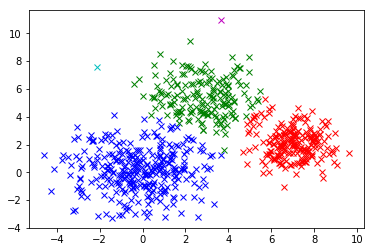

In [7]:
for i, d in enumerate(data):
    plt.plot(d[0], d[1], cluster_markers[cluster[i]])
plt.show()